In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('heart.csv')
X = df.drop('target', axis=1)
df.head()
df.info()
print(df.isnull().sum())
df_cleaned = df.dropna()
print(f"\nOriginal rows: {len(df)}, Rows after dropping NaN: {len(df_cleaned)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Origin

In [6]:
df = df_cleaned

In [7]:
# Select Features (X) and Target (y)
X_lin = df[['age']]  
y_lin = df['thalach']

# Split the data (80% training, 20% testing)
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    X_lin, y_lin, test_size=0.2, random_state=42
)

print(f"\nLinear Regression Training Set Size: {len(X_train_lin)}")
print(f"Linear Regression Testing Set Size: {len(X_test_lin)}")


Linear Regression Training Set Size: 820
Linear Regression Testing Set Size: 205


In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_lin, y_train_lin)

# Make predictions on the test set
y_pred_lin = lin_reg.predict(X_test_lin)

print(f"Linear Regression Model Trained. Intercept: {lin_reg.intercept_:.2f}, Coefficient (age): {lin_reg.coef_[0]:.2f}")

Linear Regression Model Trained. Intercept: 202.34, Coefficient (age): -0.97


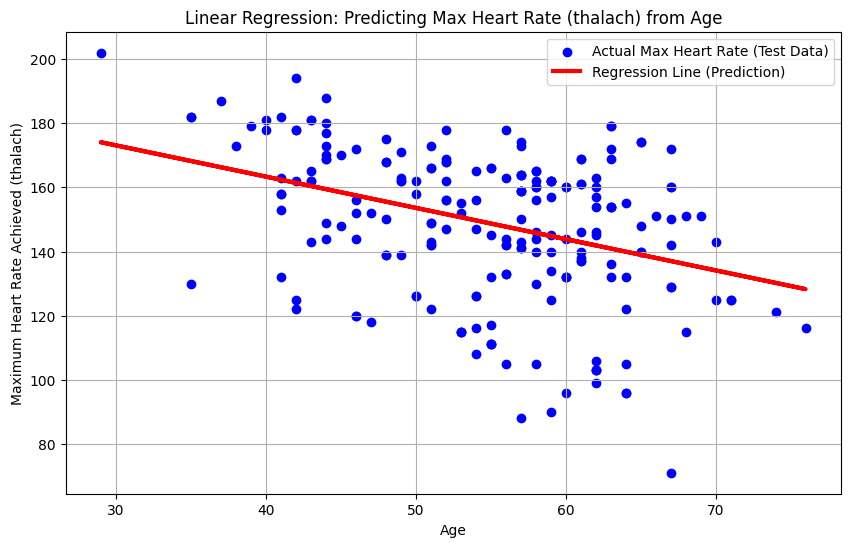

In [9]:
plt.figure(figsize=(10, 6))

# Scatter plot of test data
plt.scatter(X_test_lin, y_test_lin, color='blue', label='Actual Max Heart Rate (Test Data)')

# Plot the regression line
plt.plot(X_test_lin, y_pred_lin, color='red',linewidth=3, label='Regression Line (Prediction)')

plt.title('Linear Regression: Predicting Max Heart Rate (thalach) from Age')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved (thalach)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Select Features (X) and Target (y) for Logistic Regression
features_log = ['age', 'sex', 'cp', 'trestbps', 'chol']
X_log = df[features_log]
y_log = df['target']

# Split the data (80% training, 20% testing)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42
)

print(f"\nLogistic Regression Training Set Size: {len(X_train_log)}")
print(f"Logistic Regression Testing Set Size: {len(X_test_log)}")


Logistic Regression Training Set Size: 820
Logistic Regression Testing Set Size: 205


In [11]:
# Setting max_iter for convergence
log_reg = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
log_reg.fit(X_train_log, y_train_log)

print("\nLogistic Regression Model Trained (5 Features).")


Logistic Regression Model Trained (5 Features).


In [12]:
# Predict classes (0 or 1) for F1-Score
y_pred_log_class = log_reg.predict(X_test_log)

# Predict probabilities (needed for ROC-AUC)
# We need the probability of the positive class (class 1)
y_pred_log_proba = log_reg.predict_proba(X_test_log)[:, 1]

In [13]:
f1 = f1_score(y_test_log, y_pred_log_class)
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.7839


In [14]:
roc_auc = roc_auc_score(y_test_log, y_pred_log_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.8529


<Figure size 800x600 with 0 Axes>

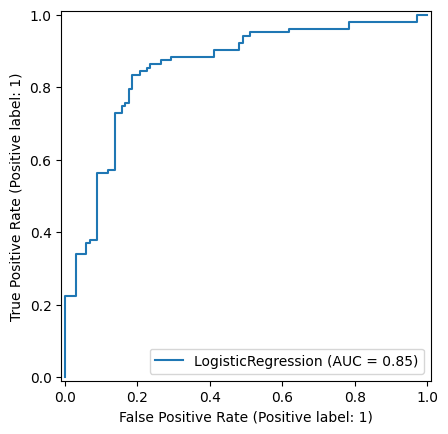

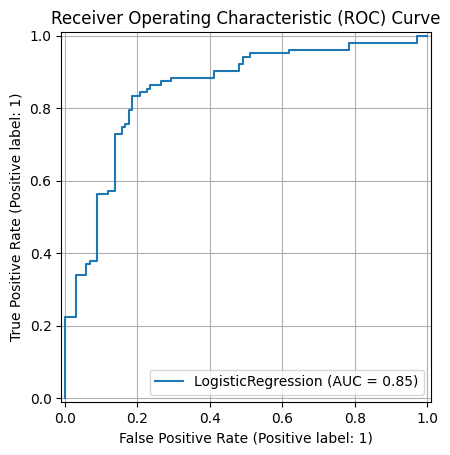

In [15]:
plt.figure(figsize=(8, 6))
# Create the ROC Curve Display
roc_display = RocCurveDisplay.from_estimator(log_reg, X_test_log, y_test_log)
roc_display.plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.grid(True)
plt.show()

In [16]:
# Select all features (excluding the target)
X_bonus = df.drop('target', axis=1)
y_bonus = df['target']

# Split the data
X_train_bonus, X_test_bonus, y_train_bonus, y_test_bonus = train_test_split(
    X_bonus, y_bonus, test_size=0.2, random_state=42
)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train_bonus)
X_test_scaled = scaler.transform(X_test_bonus)


In [17]:
# Create and train the new Logistic Regression model
log_reg_bonus = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
log_reg_bonus.fit(X_train_scaled, y_train_bonus)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'



--- Model Comparison ---
Initial 5-Feature Model: F1-Score = 0.7839, ROC-AUC = 0.8529
Bonus All-Feature Model: F1-Score = 0.8108, ROC-AUC = 0.8787


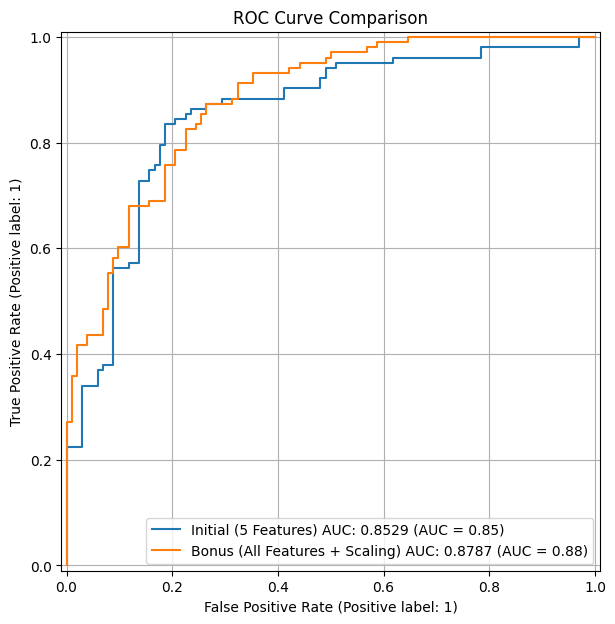

In [18]:
# Make predictions on the scaled test set
y_pred_bonus_class = log_reg_bonus.predict(X_test_scaled)
y_pred_bonus_proba = log_reg_bonus.predict_proba(X_test_scaled)[:, 1]

# Calculate F1 and ROC-AUC for the bonus model
f1_bonus = f1_score(y_test_bonus, y_pred_bonus_class)
roc_auc_bonus = roc_auc_score(y_test_bonus, y_pred_bonus_proba)

print(f"\n--- Model Comparison ---")
print(f"Initial 5-Feature Model: F1-Score = {f1:.4f}, ROC-AUC = {roc_auc:.4f}")
print(f"Bonus All-Feature Model: F1-Score = {f1_bonus:.4f}, ROC-AUC = {roc_auc_bonus:.4f}")

# Plot the ROC Curve for comparison
plt.figure(figsize=(10, 7))
# Initial 5-feature model ROC
RocCurveDisplay.from_estimator(log_reg, X_test_log, y_test_log, name=f"Initial (5 Features) AUC: {roc_auc:.4f}", ax=plt.gca())
# Bonus full-feature model ROC
RocCurveDisplay.from_estimator(log_reg_bonus, X_test_scaled, y_test_bonus, name=f"Bonus (All Features + Scaling) AUC: {roc_auc_bonus:.4f}", ax=plt.gca())
plt.title('ROC Curve Comparison')
plt.grid(True)
plt.show()